In [101]:
import sqlite3
sqlite_file = "../data/boston.db"

# connecting to the database file
conn = sqlite3.connect(sqlite_file)

# initialize a cursor object
cur = conn.cursor()

# define a traversing search
cur.execute("select * from boston limit 5;")

# fetch and print
data = cur.fetchall()
print(data)

[(0, 0.00632, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98, 24.0), (1, 0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.9, 9.14, 21.6), (2, 0.02729, 0.0, 7.07, 0.0, 0.469, 7.185, 61.1, 4.9671, 2.0, 242.0, 17.8, 392.83, 4.03, 34.7), (3, 0.03237, 0.0, 2.18, 0.0, 0.458, 6.998, 45.8, 6.0622, 3.0, 222.0, 18.7, 394.63, 2.94, 33.4), (4, 0.06905, 0.0, 2.18, 0.0, 0.458, 7.147, 54.2, 6.0622, 3.0, 222.0, 18.7, 396.9, 5.33, 36.2)]


*실무에선 보통 네트워크 주소와 로그인을 사용해서 데베에 원격 접속한다. 아아 그래서 SSL 같은걸 알아야 하는 거구나..

In [102]:
cur.execute("select ZN from boston where ZN > 0.0;")
data = cur.fetchall()
print(data)

[(18.0,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (12.5,), (75.0,), (75.0,), (21.0,), (21.0,), (21.0,), (21.0,), (75.0,), (90.0,), (85.0,), (100.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (25.0,), (17.5,), (80.0,), (80.0,), (12.5,), (12.5,), (12.5,), (25.0,), (25.0,), (25.0,), (25.0,), (28.0,), (28.0,), (28.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (45.0,), (60.0,), (60.0,), (80.0,), (80.0,), (80.0,), (80.0,), (95.0,), (95.0,), (82.5,), (82.5,), (95.0,), (95.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (30.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (22.0,), (80.0,), (80.0,), (90.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (20.0,), (40.0,), (40.0,), (40.0,), (40.0,), (40.0,), (20.0,), (20.0,), (20.0,), (20.0,), (90.0,), (90.0,), (55.0,), (80.0,), (52.5,), (52.5,), (52.5,), (80.0,), (80.0,), (80.0,), (70.0,),

위 결과는 특정한 구조가 없어 이해하기 어렵다. 이런 비구조화된 데이터를 정리할 수 있는 두 가지 방법이 있다. You can code around it and do the bookkeeping yourself with mapping that labels this output with the column "ZN" and any other constraints on the search. Alternatively, you can get use Pandas built-in SQL capability and put the results of queries directly into a dataframe. I recommend the latter strategy and will demonstrate its power in the rest of the section.

First lets duplicate our original query for the entire table, limited to 5 rows.

In [103]:
import pandas as pd

# boston 테이블에서 5개 행의 모든 데이터 가져오기
df = pd.read_sql_query("select * from boston limit 5;", conn)
#pandas shape 기능 상기할 것
print("df.shape = ", str(df.shape))

df.shape =  (5, 15)


In [104]:
df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = ", str(df.shape), end="\n\n\n")
# 데이터 점검
print("Sanity check with Pandas head():")
print(df.head(), end="\n\n\n")
# 데이터 요약
print("Summarize with Pandas describe():")
print(df.describe().transpose())

df.shape =  (506, 15)


Sanity check with Pandas head():
   record     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0       0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1       1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2       2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3       3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4       4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


Summarize with Pandas describe():
         count        mean         std        min         25%        50%  \
record   506.0  252.500000  146.213884    0.00000  126.250000  252.50000   
CRIM     506.0    3.593761    8.596783    0.00632    0.082045   

In [105]:
# 양의 ZN 값을 갖는 boston 테이블 내 모든 데이터 가져오기
df = pd.read_sql_query("select * from boston where ZN > 0.0;", conn)
print("df.shape = " + str(df.shape))
df.head()

df.shape = (134, 15)


,record,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
2,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
3,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
4,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [139]:
# 250 이상의 값을 갖는 모든 데이터
df = pd.read_sql_query("select * from boston where ZN > 0.0 and record > 250;", conn)
print("df.shape = ", str(df.shape))
df.head()

ProgrammingError: Cannot operate on a closed database.

In [140]:
# 여러 줄로 나눠 쓰는 검색 구문의 예
df = pd.read_sql_query("""
                        select record, ZN, AGE, TAX from boston
                        where ZN>0.0 and CRIM < 2.5;
                        """,
                        conn)

ProgrammingError: Cannot operate on a closed database.

데이터프레임에 있는 데이터를 수정한 후 SQL 데베로 다시 저장하고 싶다면, 수정 사항을 저장하는 것에 대한 판다스 함수를 사용할 수 있다.

In [141]:
# use Pandas 'to_sql' method to commit changes to connection
df.to_sql("../data/boston_updated", conn, if_exists='replace')
conn.close()

ProgrammingError: Cannot operate on a closed database.

### Disk

Often data is already stored locally on a disk, for example a hard drive or portable media. Loading into Pandas from disk is easy as long as file is in csv format:

In [142]:
df = pd.read_csv("../data/iris.csv")
print(df.head())

sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm species  
0                0.2  setosa  
1                0.2  setosa  
2                0.2  setosa  
3                0.2  setosa  
4                0.2  setosa  


Saving dataframe changes to a file is simple:

In [ ]:
# index 생성
#df.index.name = "record"
#df['species'] = 'new-species'
#df.to_csv("../data/iris_updated.csv", index=True)

자세한 내용은 판다스 입출력(I/O) 가이드 문서를 읽어보면 좋다.

url로 데이터를 불러올 수도 있다.

In [146]:
# load from web URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'species']
df = pd.read_csv(url, names=names)
print(df.head())

sepal length in cm  sepal width in cm  petal length in cm  \
0                 5.1                3.5                 1.4   
1                 4.9                3.0                 1.4   
2                 4.7                3.2                 1.3   
3                 4.6                3.1                 1.5   
4                 5.0                3.6                 1.4   

   petal width in cm      species  
0                0.2  Iris-setosa  
1                0.2  Iris-setosa  
2                0.2  Iris-setosa  
3                0.2  Iris-setosa  
4                0.2  Iris-setosa  


사이킷런, seaborn 패키지에 자체적으로 포함된 데이터셋도 있다. 종종 테스팅이나 예시의 용도로 사용된다. 사이킷런의 경우 아래와 같다.

In [147]:
from sklearn.datasets import load_iris
dataset = load_iris()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['species'] = dataset.target

In [148]:
import seaborn as sns
df = sns.load_dataset("flights")

In [149]:
import pandas as pd
import sqlite3
sqlite_file = '../data/boston.db' 
# Connecting to the database file
conn = sqlite3.connect(sqlite_file)


df = pd.read_sql_query("select * from boston;", conn)
print("df.shape = " + str(df.shape))
df.set_index("record", inplace=True)
conn.close()


df.shape = (506, 15)


In [150]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [151]:
# 전치행렬 형태로 통계량 요약을 확인하는 것!
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [145]:
df.max()

sepal length in cm          7.9
sepal width in cm           4.4
petal length in cm          6.9
petal width in cm           2.5
species               virginica
dtype: object

In [144]:
df.min()

sepal length in cm       4.3
sepal width in cm          2
petal length in cm         1
petal width in cm        0.1
species               setosa
dtype: object

In [143]:
df.mean() #평균값

sepal length in cm    5.843333
sepal width in cm     3.054000
petal length in cm    3.758667
petal width in cm     1.198667
dtype: float64

In [152]:
df.median() #중앙값

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
dtype: float64

In [153]:
#최대&소값의 인덱스
df.idxmax()

CRIM       380
ZN          57
INDUS      488
CHAS       142
NOX        142
RM         364
AGE          8
DIS        353
RAD        356
TAX        488
PTRATIO    354
B            0
LSTAT      374
MEDV       161
dtype: int64

In [154]:
df.idxmin()

CRIM         0
ZN           1
INDUS      195
CHAS         0
NOX        286
RM         365
AGE         41
DIS        372
RAD          0
TAX        353
PTRATIO    196
B          450
LSTAT      161
MEDV       398
dtype: int64

In [155]:
# 데이터의 첫번째 행
df.loc[0]

CRIM         0.00632
ZN          18.00000
INDUS        2.31000
CHAS         0.00000
NOX          0.53800
RM           6.57500
AGE         65.20000
DIS          4.09000
RAD          1.00000
TAX        296.00000
PTRATIO     15.30000
B          396.90000
LSTAT        4.98000
MEDV        24.00000
Name: 0, dtype: float64

In [156]:
# CRIM 열의 첫번째 행
df.loc[0]['CRIM']

0.00632

In [157]:
# 단일 열 분리하기(isolate single columns)
df['AGE'].mean()

68.57490118577076

In [158]:
df['MEDV'].idxmax()

161

In [159]:
# sort (ascending by default)
df.sort_values(by= 'ZN')
# sort descending
df.sort_values(by = 'ZN', ascending = False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
record,,,,,,,,,,,,,,
57,0.01432,100.0,1.32,0.0,0.4110,6.816,40.5,8.3248,5.0,256.0,15.1,392.90,3.95,31.6
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
203,0.03510,95.0,2.68,0.0,0.4161,7.853,33.2,5.1180,4.0,224.0,14.7,392.78,3.81,48.5
200,0.01778,95.0,1.47,0.0,0.4030,7.135,13.9,7.6534,3.0,402.0,17.0,384.30,4.45,32.9
199,0.03150,95.0,1.47,0.0,0.4030,6.975,15.3,7.6534,3.0,402.0,17.0,396.90,4.56,34.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.12204,0.0,2.89,0.0,0.4450,6.625,57.8,3.4952,2.0,276.0,18.0,357.98,6.65,28.4
96,0.11504,0.0,2.89,0.0,0.4450,6.163,69.6,3.4952,2.0,276.0,18.0,391.83,11.34,21.4
97,0.12083,0.0,2.89,0.0,0.4450,8.069,76.0,3.4952,2.0,276.0,18.0,396.90,4.21,38.7


In [160]:
# 메모리에 저장돼 있는 데이터를 영구적으로 정렬(inplace option)
df.sort_values(by = 'ZN', inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
record,,,,,,,,,,,,,,
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24.0,666.0,20.2,396.90,22.88,12.8
440,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11,10.5
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,19.52,17.1
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4


In [161]:
# 원래의 인덱스 열에 따라 다시 정렬하면 이전의 정렬 철회
df.sort_values(by = 'record', inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
record,,,,,,,,,,,,,,
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [162]:
# 짝수 레코드만 보여주도록 데이터프레임 필터 적용
df[df.index % 2 == 0]
df[df['AGE']>95].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,111.0,9.131193,12.525663,0.09849,1.20826,5.87205,11.7645,73.5341
ZN,111.0,0.585586,3.125317,0.00000,0.00000,0.00000,0.0000,20.0000
INDUS,111.0,17.862342,4.606760,2.46000,18.10000,18.10000,19.5800,27.7400
CHAS,111.0,0.063063,0.244179,0.00000,0.00000,0.00000,0.0000,1.0000
NOX,111.0,0.664649,0.093411,0.44800,0.60500,0.65900,0.7000,0.8710
RM,111.0,5.940144,0.712860,3.86300,5.49400,6.00600,6.4030,7.9290
AGE,111.0,98.280180,1.657864,95.20000,96.95000,98.40000,100.0000,100.0000
DIS,111.0,1.999828,0.873839,1.13700,1.52335,1.80260,2.1088,6.0821
RAD,111.0,15.153153,9.832412,2.00000,5.00000,24.00000,24.0000,24.0000
TAX,111.0,541.459459,156.998482,188.00000,403.00000,666.00000,666.0000,711.0000


데이터 시각화에 쓰이는 인기 있는 플롯 종류
=====
스캐터 플롯
-----
스캐터 플롯은 두 변수 사이 관계를 시각화하는 간편한 방법이다. 판다스의 lmplot(), scatterplot() 루틴으로 만들 수 있다. 다만 lmplot은 데이터를 선형 회귀 분석으로 적합시키고 이를 그려주는 fit_reg 옵션을 포함한 몇몇 기능이 더 있다.

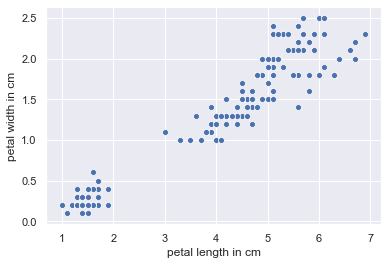

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df = pd.read_csv("../data/iris.csv")
sns.scatterplot(x='petal length in cm', y='petal width in cm', data=df)

Next, label the datapoints by color and add legend(범례) with the hue argument:


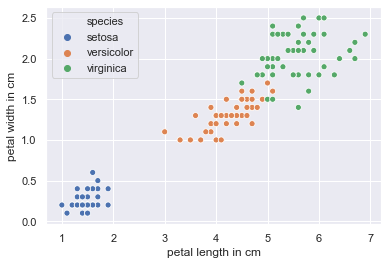

In [164]:
sns.scatterplot(x='petal length in cm', y='petal width in cm', hue='species', data=df)

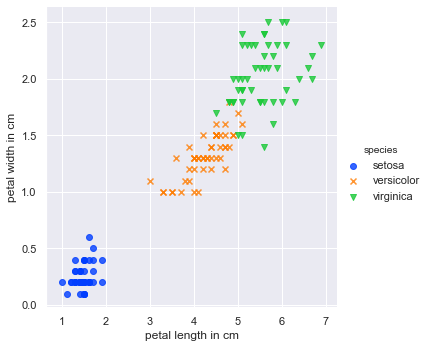

In [165]:
sns.lmplot(x='petal length in cm', y='petal width in cm', hue="species", data=df, fit_reg=False,
           palette='bright',markers=['o','x','v'])

히스토그램
-----
히스토그램은 빈도 분포를 나타내는 시각화다. 막대그래프와 비슷하며, 단일 변수를 다루고 y축은 빈도를 표시한다.

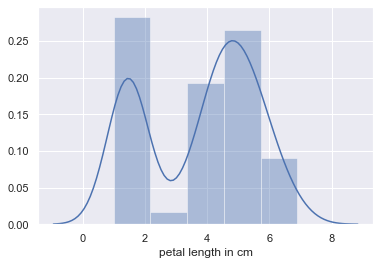

In [166]:
sns.distplot(df['petal length in cm'])

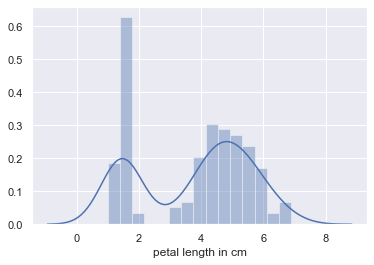

In [167]:
# 막대 수 늘려 분포 표시하기
sns.distplot(df['petal length in cm'], bins=15)

Jointplot
-----
스캐터 플롯과 히스토그램을 두 개의 변수에 대해 결합하는 루틴이다.

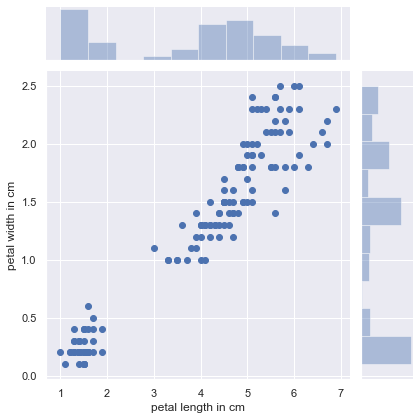

In [168]:
sns.jointplot(x='petal length in cm', y='petal width in cm', data=df, kind='scatter', marginal_kws=dict(bins=10))
# Q. marginal_kws 옵션에서 kws는 무엇?

밀도 추정치가 시각화하기 쉽다면 이를 플롯할 수 있다.

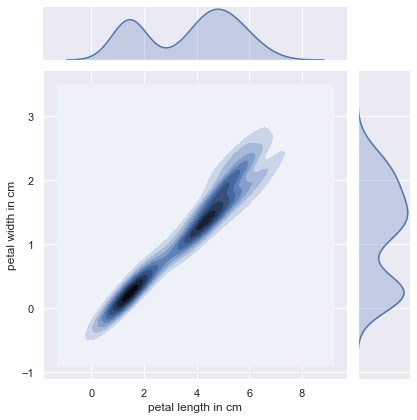

In [169]:
sns.jointplot(x='petal length in cm', y='petal width in cm', data=df, kind='kde')

바이올린 플롯
-----
클래스별로 나뉜 단일 변수의 분포를 보여주는 가장 효율적인 플롯 중 하나. 이전 단원에서 x는 species로 설정했고, y는 꽃받침의 너비로도 설정해봤고 꽃잎의 너비로도 설정해봤다. 이런 식으로 꽃잎의 너비에 대한 바이올린 플롯이 꽃받침 너비에 대한 바이올린 플롯보다 바이올린 사이 구별이 더 확실하게 되는 것을 볼 수 있다. 각 바이올린은 클래스를 의미하므로 꽃잎의 너비 변수는 한 클래스를 다른 클래스와 구별하는데 더 유용하단 것을 알 수 있다.

### Pairplot (p.83)

Seaborn's **pairplot** is a "routine" in the most literal sense. It will plot scatter plots of multiple variable against each other with histograms plotted in the diagonals. This is a good way to explore a new dataset when you don't know much about the relationships. It is the first place to start when entering the exploratory data analysis stage, especially if you are new to the problem statement. 

하지만 특징의 개수가 너무 많아지면 콘솔에 보이는 정보가 너무 많아진다. 여기서 보이는 변수의 수를 줄이기 위해 판다스의 리스트 기반 열 접근을 사용할 수 있다. 5개의 선택된 변수에 대해 페어 플롯을 작성하면 아래와 같다.

In [170]:
# pairplot with selected features
vars_to_plot = ['CRIM', 'AGE', 'DIS', 'LSTAT', 'MEDV']
sns.pairplot(data=df, vars=vars_to_plot)

KeyError: 'CRIM'